In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
x,y=make_classification(n_samples=2000,weights=[1,1],random_state=1)

In [4]:
x.shape

(2000, 20)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Random Forest Classiffier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_train_predict=rf.predict_proba(x_train)
y_train_predict #second column will have probabilities of vlaues becoming one
print("Rf train Roc-auc:{}".format(roc_auc_score(y_train,y_train_predict[:,1])))
y_test_predict=rf.predict_proba(x_test)
print("Rf-test Roc-auc: {}".format(roc_auc_score(y_test,y_test_predict[:,1])))

Rf train Roc-auc:1.0
Rf-test Roc-auc: 0.9810555555555556


#### Logistics Regression

In [8]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_train_predict=lg.predict_proba(x_train)
print("Roc-auc of y_train logistics :{}".format(roc_auc_score(y_train,y_train_predict[:,1])))
y_test_proba=lg.predict_proba(x_test)
print("Roc_auc of y_test logistics:{}".format(roc_auc_score(y_test,y_test_proba[:,1])))

Roc-auc of y_train logistics :0.9863568922694498
Roc_auc of y_test logistics:0.9885777777777777


#### Ada Boost Classifiers 

In [9]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_train_prob=ad.predict_proba(x_train)
print("Roc_Auc of AdaboostClassifier for x_train{}".format(roc_auc_score(y_train,y_train_prob[:,1])))
y_test_prob=ad.predict_proba(x_test)
print("Roc_Auc of Adaboostclassfiier for x_test{}".format(roc_auc_score(y_test,y_test_prob[:,1])))

Roc_Auc of AdaboostClassifier for x_train0.9975081174960356
Roc_Auc of Adaboostclassfiier for x_test0.9826111111111111


#### KNNCLASSIFIER

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
y_train_predict=knc.predict_proba(x_train)
print("Roc_auc of y_train_predict : {}".format(roc_auc_score(y_train,y_train_predict[:,1])))
y_test_predict=knc.predict_proba(x_test)
print("Roc_auc of y_train_preidfct :{}".format(roc_auc_score(y_test,y_test_predict[:,1])))

Roc_auc of y_train_predict : 0.981670071491109
Roc_auc of y_train_preidfct :0.9426111111111111


#### Trying to find the best threshold for maximum accuracy

In [11]:
pred=[]
for model in [rf,lg,ad,knc]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print("Ensemble test of Roc_auc: {}".format(roc_auc_score(y_test,final_prediction)))

Ensemble test of Roc_auc: 0.9848999999999999


In [12]:
pd.concat(pred,axis=1).head()

,0,1,2,3
0,0.98,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.97,0.966929,0.538202,0.8
3,0.91,0.761539,0.509875,0.8
4,0.67,0.779443,0.490344,0.4


In [13]:
fpr,tpr,threshold=roc_curve(y_test,final_prediction)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in threshold:
    y_pred=np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred))
accuracy_ls=pd.concat([pd.Series(threshold),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns=["Thresholds","Accuracy"]

In [15]:
accuracy_ls.sort_values(by="Accuracy",ascending=False,inplace=True)

In [16]:
accuracy_ls.head()

,Thresholds,Accuracy
31,0.427228,0.960000
30,0.464506,0.960000
26,0.551059,0.960000
32,0.427103,0.958333
29,0.498669,0.958333


###### From above Data frame we can choose the threshold with best accuracy

#### Plotting of Roc curve

In [17]:
def plot_roc_curve(fpr,tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr,tpr,color="yellow",label="ROC")
    plt.plot([0,1],[0,1],linestyle="dashed",color="Green",label="")
    plt.xlabel("False Postive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

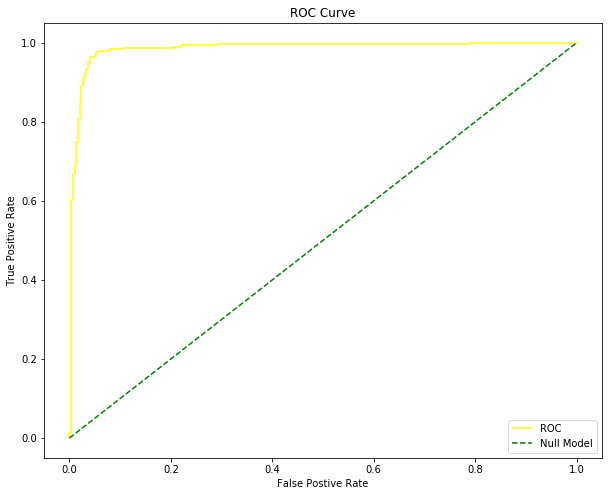

In [18]:
plot_roc_curve(fpr,tpr)